# **FAKE NEWS DETECION**

In [53]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import warnings
warnings.filterwarnings('ignore')

**1.** **DESCPTION OF THE DATASET**

In [2]:
import csv
df=pd.read_csv('/kaggle/input/my-dataset-1/news.csv')


In [3]:
df.shape

(6335, 4)

In [4]:
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [5]:
df.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [7]:
df.describe(include = object)

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


In [8]:
df['text'].isnull().sum()

0

In [9]:
df.fillna('', inplace=True)

In [10]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [11]:
labels=df.label
labels.head(10)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

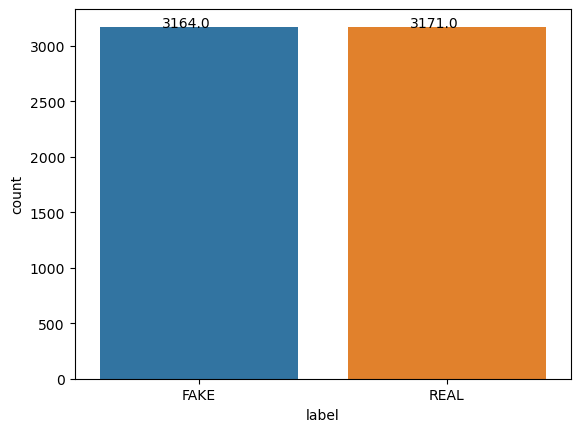

In [12]:
ax=sns.countplot(x ='label', data = df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

**2.** **DATA PRE-PROCESSING**

In [13]:
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,ImageColorGenerator
import string
from nltk.stem import WordNetLemmatizer

In [14]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [15]:
df["text"] = df["text"].apply(wordopt)
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,daniel greenfield a shillman journalism fello...,FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,u s secretary of state john f kerry said mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,kaydee king kaydeeking november the le...,FAKE
4,875,The Battle of New York: Why This Primary Matters,it s primary day in new york and front runners...,REAL
5,6903,"Tehran, USA",i m not an immigrant but my grandparents a...,FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,share this baylee luciani left screenshot o...,FAKE
7,95,‘Britain’s Schindler’ Dies at 106,a czech stockbroker who saved more than jewis...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,hillary clinton and donald trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,iranian negotiators reportedly have made a las...,REAL


In [54]:
df['text'].str.replace('[{}]'.format(string.punctuation), '')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,daniel greenfield a shillman journalism fello...,FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,u s secretary of state john f kerry said mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,kaydee king kaydeeking november the le...,FAKE
4,875,The Battle of New York: Why This Primary Matters,it s primary day in new york and front runners...,REAL


In [17]:
text = df['text'].str.lower()
text.head()

0    daniel greenfield  a shillman journalism fello...
1    google pinterest digg linkedin reddit stumbleu...
2    u s  secretary of state john f  kerry said mon...
3      kaydee king   kaydeeking  november    the le...
4    it s primary day in new york and front runners...
Name: text, dtype: object

In [18]:
all_spam = df['text'].str.split(' ')
all_spam.head()

0    [daniel, greenfield, , a, shillman, journalism...
1    [google, pinterest, digg, linkedin, reddit, st...
2    [u, s, , secretary, of, state, john, f, , kerr...
3    [, , kaydee, king, , , kaydeeking, , november,...
4    [it, s, primary, day, in, new, york, and, fron...
Name: text, dtype: object

In [19]:
all_spam_cleaned = []

for text in all_spam:
    text = [x.strip(string.punctuation) for x in text]
    all_spam_cleaned.append(text)

all_spam_cleaned[0]

text_spam = [" ".join(text) for text in all_spam_cleaned]
final_text_spam = " ".join(text_spam)

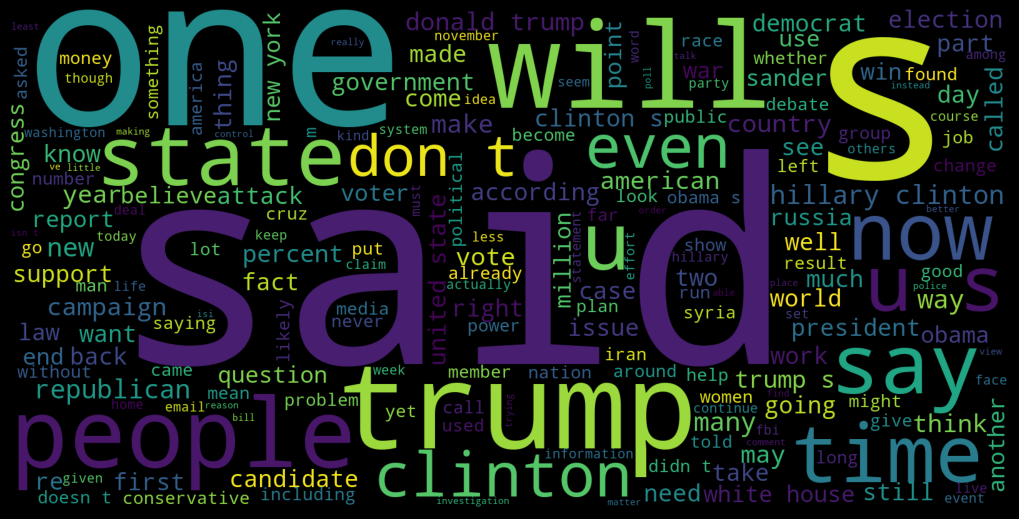

In [20]:
text = final_text_spam
wordcloud = WordCloud(width=1600, height=800).generate(text)
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [21]:
text = df['title'].str.lower()
text.head()

0                         you can smell hillary’s fear
1    watch the exact moment paul ryan committed pol...
2          kerry to go to paris in gesture of sympathy
3    bernie supporters on twitter erupt in anger ag...
4     the battle of new york: why this primary matters
Name: title, dtype: object

In [22]:
all_spam = df['title'].str.split(' ')
all_spam.head()

0                   [You, Can, Smell, Hillary’s, Fear]
1    [Watch, The, Exact, Moment, Paul, Ryan, Commit...
2    [Kerry, to, go, to, Paris, in, gesture, of, sy...
3    [Bernie, supporters, on, Twitter, erupt, in, a...
4    [The, Battle, of, New, York:, Why, This, Prima...
Name: title, dtype: object

In [23]:
all_spam_cleaned = []

for text in all_spam:
    text = [x.strip(string.punctuation) for x in text]
    all_spam_cleaned.append(text)

all_spam_cleaned[0]

text_spam = [" ".join(text) for text in all_spam_cleaned]
final_text_spam = " ".join(text_spam)

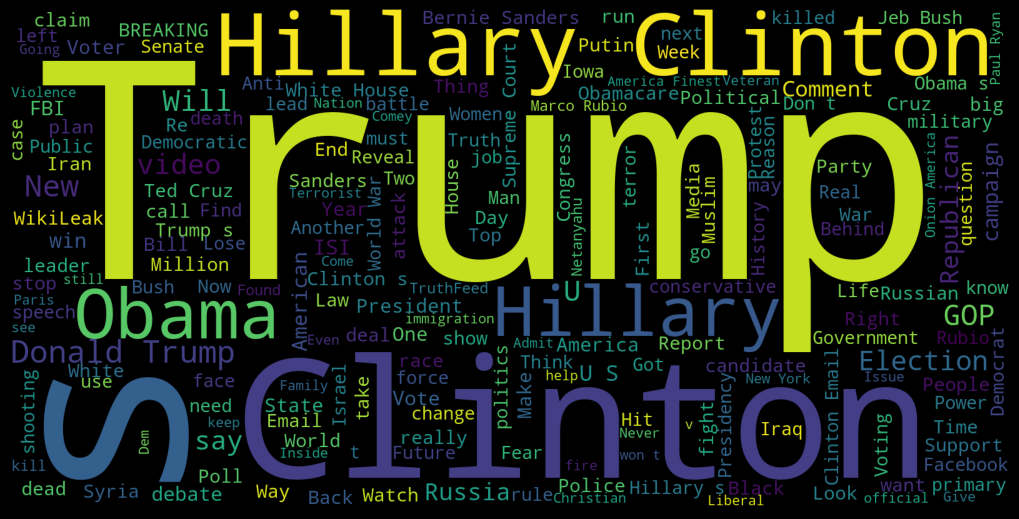

In [24]:
text = final_text_spam
wordcloud = WordCloud(width=1600, height=800).generate(text)
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [25]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [26]:
x_text=df['title'].tolist()
x=x_text[10:15]

In [27]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english')
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')

tfidf_train=tfidf_vectorizer.fit_transform(x) 

count_wm = countvectorizer.fit_transform(x)
tfidf_wm = tfidf_vectorizer.fit_transform(x)
count_tokens = countvectorizer.get_feature_names_out()
tfidf_tokens = tfidf_vectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

Count Vectorizer

   10  2016  26  america  campaign  clinton  clintons  cruz  delegate  donald  \
0   0     0   0        0         1        1         1     0         0       0   
1   0     0   0        0         0        0         0     0         1       1   
2   0     1   1        0         0        0         0     0         0       0   
3   1     0   0        1         0        0         0     0         0       0   
4   0     0   0        0         0        0         0     1         0       0   

   ...  takes  tech  today  trump  video  war  ways  weak  world  worse  
0  ...      0     0      0      0      0    0     0     0      0      0  
1  ...      0     0      0      1      0    0     0     1      0      1  
2  ...      0     1      1      0      1    0     0     0      0      0  
3  ...      0     0      0      0      0    1     1     0      1      0  
4  ...      1     0      0      1      0    0     0     0      0      0  

[5 rows x 36 columns]

TD-IDF Vectorizer

        

In [28]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.3, random_state=7)

In [29]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)
print('TF-IDF VECTORIZER FOR TRAINED DATA\n')
print(tfidf_train)
print('\nTF-IDF VECTORIZER FOR TESTED DATA\n')
print(tfidf_test)

TF-IDF VECTORIZER FOR TRAINED DATA

  (0, 43904)	0.018315847467265473
  (0, 16059)	0.0263863294058777
  (0, 25273)	0.01731755778546683
  (0, 41396)	0.01937737022615556
  (0, 29836)	0.02305018537867541
  (0, 29280)	0.01954450700262361
  (0, 54083)	0.014056655724628568
  (0, 24093)	0.044724909461666996
  (0, 16050)	0.03263174279456294
  (0, 11879)	0.020841829354597986
  (0, 43650)	0.02375170943053865
  (0, 27796)	0.02151199255260575
  (0, 608)	0.03663751424748607
  (0, 31536)	0.01790112894223634
  (0, 14111)	0.013295544822360587
  (0, 13299)	0.02229540076651543
  (0, 25436)	0.044724909461666996
  (0, 10639)	0.025553705299527895
  (0, 46364)	0.034101509092562286
  (0, 37015)	0.019844988449991628
  (0, 25791)	0.022782308893070976
  (0, 8527)	0.019055666462611056
  (0, 49590)	0.024321590593815837
  (0, 38018)	0.030129025969517356
  (0, 28286)	0.019161111624053838
  :	:
  (4433, 28712)	0.09485380841192081
  (4433, 205)	0.0453635032758838
  (4433, 30018)	0.08270462277260318
  (4433, 28414)	0.

**3.** **MACHINE LEARNING ALGORITHMS**

In [46]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix,f1_score,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

* ***Passive Aggressive Classifier***

In [43]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac=pac.fit(tfidf_train,y_train)
y_pred=pac.predict(tfidf_test)
xscore=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(xscore*100,2)}%')

Accuracy: 92.37%


In [32]:
print(classification_report(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='REAL'))
print('F1 score:',metrics.f1_score(y_test, y_pred,pos_label='REAL'))
print('Recall:',metrics.recall_score(y_test, y_pred,pos_label='REAL'))

              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.93       974
        REAL       0.92      0.92      0.92       927

    accuracy                           0.92      1901
   macro avg       0.92      0.92      0.92      1901
weighted avg       0.92      0.92      0.92      1901

Precision: 0.9204301075268817
F1 score: 0.9219170705438879
Recall: 0.9234088457389428


[[900  74]
 [ 71 856]]


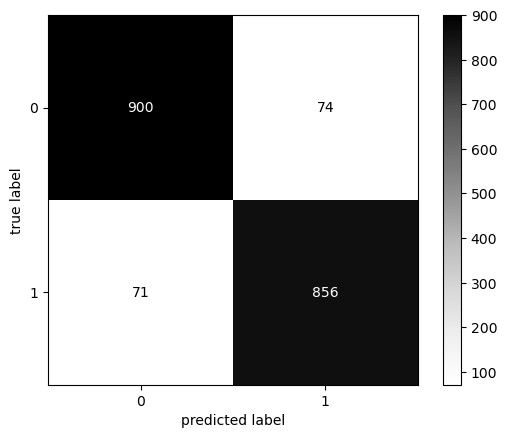

In [33]:
cf=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf)
binary1 =cf
ax = plot_confusion_matrix(conf_mat=binary1,colorbar=True,cmap='Greys',fontcolor_threshold=0.4)
plt.show()

* ***Naive Bayes Classifier***

In [50]:
clf = GaussianNB()
clf.fit(tfidf_train.toarray(),y_train)
y_pred = clf.predict(tfidf_test.toarray())
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 80.59%


[[742 232]
 [137 790]]


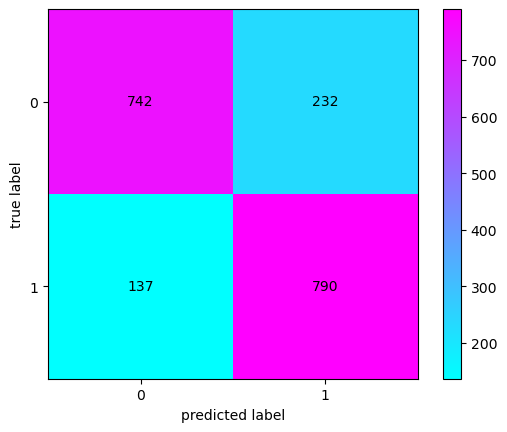

In [35]:
cf=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf)
binary1 =cf
ax = plot_confusion_matrix(conf_mat=binary1,colorbar=True,cmap='cool',fontcolor_threshold=3)
plt.show()

In [36]:
print(classification_report(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='REAL'))
print('F1 score:',metrics.f1_score(y_test, y_pred,pos_label='REAL'))
print('Recall:',metrics.recall_score(y_test, y_pred,pos_label='REAL'))


              precision    recall  f1-score   support

        FAKE       0.84      0.76      0.80       974
        REAL       0.77      0.85      0.81       927

    accuracy                           0.81      1901
   macro avg       0.81      0.81      0.81      1901
weighted avg       0.81      0.81      0.81      1901

Precision: 0.7729941291585127
F1 score: 0.8106721395587481
Recall: 0.8522114347357066


* ***Random Forest classifier***

In [37]:
rfc = RandomForestClassifier()
rfc = rfc.fit(tfidf_train,y_train)
y_pred = rfc.predict(tfidf_test)
zscore=accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(zscore*100,2)}%')

Accuracy: 89.64%


[[873 101]
 [ 96 831]]


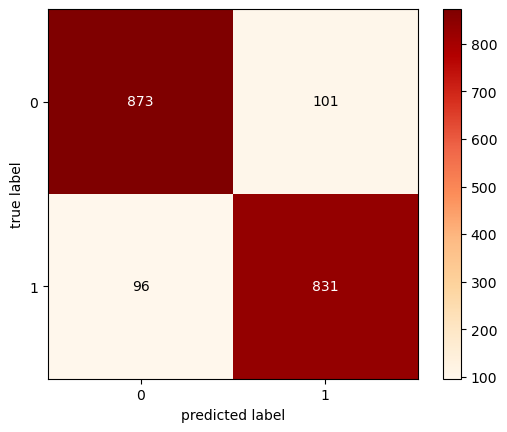

In [38]:
cf=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf)
binary1 =cf
ax = plot_confusion_matrix(conf_mat=binary1,colorbar=True,cmap='OrRd',fontcolor_threshold=0.4)
plt.show()

In [39]:
print(classification_report(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='REAL'))
print('F1 score:',metrics.f1_score(y_test, y_pred,pos_label='REAL'))
print('Recall:',metrics.recall_score(y_test, y_pred,pos_label='REAL'))

              precision    recall  f1-score   support

        FAKE       0.90      0.90      0.90       974
        REAL       0.89      0.90      0.89       927

    accuracy                           0.90      1901
   macro avg       0.90      0.90      0.90      1901
weighted avg       0.90      0.90      0.90      1901

Precision: 0.8916309012875536
F1 score: 0.8940290478752018
Recall: 0.8964401294498382


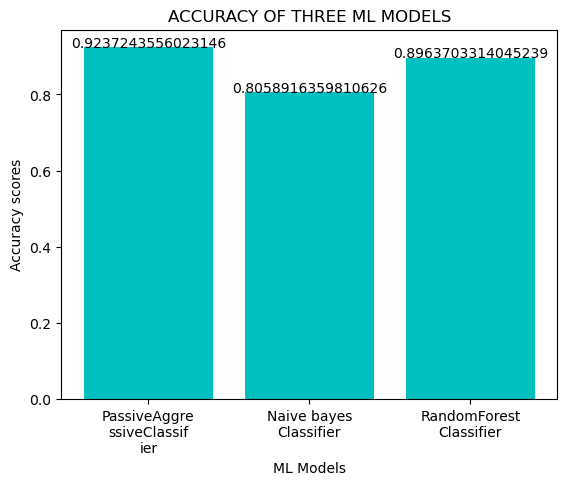

In [40]:
from textwrap import wrap
x=['PassiveAggressiveClassifier','Naive bayes Classifier','RandomForestClassifier']
y=[xscore,yscore,zscore]
x = [ '\n'.join(wrap(l, 12)) for l in x ]
plt.bar(x,y,color='c')
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = 'center')
plt.title("ACCURACY OF THREE ML MODELS")
plt.ylabel("Accuracy scores")
plt.xlabel("ML Models")
plt.show()